# Importing Necessary Libraries

In [62]:
# Data handling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing
import re

# File handling
import pickle

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Kaggle integration
import kagglehub

# Step 1: Import & Explore Dataset

In [ ]:
# Kaggle Dataset path
path = kagglehub.dataset_download("fahimvj/bengali-sms-spam-detection-dataset")

print("Path to dataset files:", path)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 118k/118k [00:00<00:00, 65.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/fahimvj/bengali-sms-spam-detection-dataset/versions/1


In [ ]:
# Load dataset
df = pd.read_csv(f"{path}/bangla_spam.csv")
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [ ]:
df

type                                               text
0     spam  ‡¶è‡¶á ‡¶Æ‡ßá‡¶∏‡ßá‡¶ú‡¶ü‡¶ø ‡¶∂‡ßá‡¶Ø‡¶º‡¶æ‡¶∞ ‡¶ï‡¶∞‡ßÅ‡¶® ‡¶è‡¶¨‡¶Ç ‡¶ú‡¶ø‡¶§‡ßá ‡¶®‡¶ø‡¶® ‡¶Ü‡¶ï‡¶∞‡ßç‡¶∑‡¶£‡ßÄ‡¶Ø‡¶º ...
1     spam  ‡¶Ü‡¶™‡¶®‡¶æ‡¶∞ ‡¶¨‡¶®‡ßç‡¶ß‡ßÅ‡¶¶‡ßá‡¶∞ ‡¶∞‡ßá‡¶´‡¶æ‡¶∞ ‡¶ï‡¶∞‡ßÅ‡¶® ‡¶è‡¶¨‡¶Ç ‡¶™‡ßç‡¶∞‡¶§‡¶ø ‡¶∞‡ßá‡¶´‡¶æ‡¶∞‡ßá‡¶≤‡ßá ‡ß®...
2      ham  ‡¶ü‡ßç‡¶∞‡¶æ‡¶®‡¶ú‡ßç‡¶Ø‡¶æ‡¶ï‡¶∂‡¶® ‡¶®‡¶Æ‡ßç‡¶¨‡¶∞ R234321.1554.640085 20 ‡¶ü‡¶æ‡¶ï‡¶æ...
3     spam  ‡¶®‡¶§‡ßÅ‡¶® ‡¶Ö‡¶´‡¶æ‡¶∞! ‡¶∏‡ßÄ‡¶Æ‡¶ø‡¶§ ‡¶∏‡¶Æ‡¶Ø‡¶º‡ßá‡¶∞ ‡¶ú‡¶®‡ßç‡¶Ø ‡¶™‡¶£‡ßç‡¶Ø‡ßá‡¶∞ ‡¶â‡¶™‡¶∞ ‡ßØ‡ß¶% ‡¶™‡¶∞...
4      ham  ‡¶®‡¶¨‡¶¨‡¶∞‡ßç‡¶∑‡ßá‡¶∞ ‡¶∂‡ßÅ‡¶≠‡ßá‡¶ö‡ßç‡¶õ‡¶æ!! ‡¶Ü‡¶≤‡ßç‡¶≤‡¶æ‡¶π ‡¶Ü‡¶™‡¶®‡¶æ‡¶∞ ‡¶∏‡¶ï‡¶≤ ‡¶ï‡¶∑‡ßç‡¶ü ‡¶¶‡ßÇ‡¶∞ ...
...    ...                                                ...
2597  spam   ‡¶™‡ßç‡¶∞‡¶§‡¶ø‡¶¶‡¶ø‡¶® ‡ßß‡ß¶‡ß¶ ‡¶ü‡¶æ‡¶ï‡¶æ ‡¶ú‡¶ø‡¶§‡¶§‡ßá ‡¶ö‡¶æ‡¶®? ‡¶è‡¶ñ‡¶®‡¶á ‡¶Ö‡¶Ç‡¶∂‡¶ó‡ßç‡¶∞‡¶π‡¶£ ‡¶ï‡¶∞‡ßÅ‡¶®!
2598  spam  ‡¶Æ‡ßã‡¶¨‡¶æ‡¶á‡¶≤ ‡¶Ö‡ßç‡¶Ø‡¶æ‡¶™ ‡¶°‡¶æ‡¶â‡¶®‡¶≤‡ßã‡¶° ‡¶ï‡¶∞‡ßÅ‡¶® ‡¶è‡¶¨‡¶Ç ‡ß´‡ß¶‡ß¶ ‡¶ü‡¶æ‡¶ï‡¶æ ‡¶¨‡ßã‡¶®‡¶æ‡¶∏ ‡¶™‡¶æ‡¶®!
2599  spam    ‡¶®‡¶§‡ßÅ‡¶® ‡¶ó‡ßç‡¶∞‡¶æ‡¶π‡¶ï‡¶¶‡ßá‡¶∞ ‡¶ú‡¶®‡ßç‡¶Ø ‡¶¨‡¶ø‡¶∂‡ßá‡¶∑ ‡¶Ö‡¶´‡¶æ‡¶∞, ‡¶Ü‡¶ú‡¶á ‡¶â‡¶™‡¶≠‡ßã‡¶ó ‡¶ï‡¶∞‡ßÅ‡¶®!
2600  spam  ‡¶Ü‡¶™‡¶®‡¶æ‡¶∞ ‡¶Ö‡ßç‡¶Ø‡¶æ‡¶ï‡¶æ‡¶â‡¶®‡ßç‡¶ü ‡¶Ü‡¶™‡¶ó‡ßç‡¶∞‡ßá‡¶° ‡¶ï‡¶∞‡ßÅ‡¶® ‡¶è‡¶¨‡¶Ç ‡¶è‡¶ï‡ßç‡¶∏‡¶ï‡ßç‡¶≤‡ßÅ‡¶∏‡¶ø‡¶≠ ...
2601  spam  ‡¶¨‡¶ø‡¶∂‡ßá‡¶∑ ‡¶õ‡¶æ‡¶°‡¶º! ‡ß®‡ß™ ‡¶ò‡¶®‡ßç‡¶ü‡¶æ‡¶∞ ‡¶Æ‡¶ß‡ßç‡¶Ø‡ßá ‡¶Ö‡¶∞‡ßç‡¶°‡¶æ‡¶∞ ‡¶ï‡¶∞‡ßÅ‡¶® ‡¶è‡¶¨‡¶Ç ‡ß©‡ß¶...

[2602 rows x 2 columns]

In [ ]:
# --- Explore Dataset ---
# Shape of dataset
print("Shape of dataset:", df.shape)

Shape of dataset: (2602, 2)


In [ ]:
# Info about columns
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602 entries, 0 to 2601
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    2602 non-null   object
 1   text    2602 non-null   object
dtypes: object(2)
memory usage: 40.8+ KB
None


# Step 2: Preprocessing with pandas

In [ ]:
# Check for null values
print("\nNull values in each column:")
print(df.isnull().sum())


Null values in each column:
type    0
text    0
dtype: int64


In [ ]:
# Check for duplicates
print("\nDuplicate rows:", df.duplicated().sum())


Duplicate rows: 25


In [ ]:
# Remove duplicate rows (keep the first occurrence by default)
df = df.drop_duplicates()

In [ ]:
df.shape

(2577, 2)

In [ ]:
# Class distribution
print("\nClass distribution:")
print(df['type'].value_counts())
print("\nClass distribution (%):")
print(df['type'].value_counts(normalize=True) * 100)


Class distribution:
type
spam    1399
ham     1178
Name: count, dtype: int64

Class distribution (%):
type
spam    54.287932
ham     45.712068
Name: proportion, dtype: float64


/tmp/ipython-input-3901349466.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


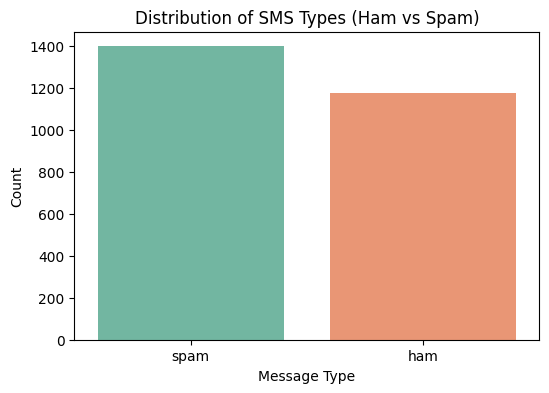

In [ ]:
# --- Visualization ---
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df, palette='Set2')
plt.title("Distribution of SMS Types (Ham vs Spam)")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()

In [ ]:
# --- Encode labels ---
df['label'] = df['type'].map({'ham': 0, 'spam': 1})

/tmp/ipython-input-2110052569.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['type'].map({'ham': 0, 'spam': 1})


In [ ]:
df.head()

type                                               text  label
0  spam  ‡¶è‡¶á ‡¶Æ‡ßá‡¶∏‡ßá‡¶ú‡¶ü‡¶ø ‡¶∂‡ßá‡¶Ø‡¶º‡¶æ‡¶∞ ‡¶ï‡¶∞‡ßÅ‡¶® ‡¶è‡¶¨‡¶Ç ‡¶ú‡¶ø‡¶§‡ßá ‡¶®‡¶ø‡¶® ‡¶Ü‡¶ï‡¶∞‡ßç‡¶∑‡¶£‡ßÄ‡¶Ø‡¶º ...      1
1  spam  ‡¶Ü‡¶™‡¶®‡¶æ‡¶∞ ‡¶¨‡¶®‡ßç‡¶ß‡ßÅ‡¶¶‡ßá‡¶∞ ‡¶∞‡ßá‡¶´‡¶æ‡¶∞ ‡¶ï‡¶∞‡ßÅ‡¶® ‡¶è‡¶¨‡¶Ç ‡¶™‡ßç‡¶∞‡¶§‡¶ø ‡¶∞‡ßá‡¶´‡¶æ‡¶∞‡ßá‡¶≤‡ßá ‡ß®...      1
2   ham  ‡¶ü‡ßç‡¶∞‡¶æ‡¶®‡¶ú‡ßç‡¶Ø‡¶æ‡¶ï‡¶∂‡¶® ‡¶®‡¶Æ‡ßç‡¶¨‡¶∞ R234321.1554.640085 20 ‡¶ü‡¶æ‡¶ï‡¶æ...      0
3  spam  ‡¶®‡¶§‡ßÅ‡¶® ‡¶Ö‡¶´‡¶æ‡¶∞! ‡¶∏‡ßÄ‡¶Æ‡¶ø‡¶§ ‡¶∏‡¶Æ‡¶Ø‡¶º‡ßá‡¶∞ ‡¶ú‡¶®‡ßç‡¶Ø ‡¶™‡¶£‡ßç‡¶Ø‡ßá‡¶∞ ‡¶â‡¶™‡¶∞ ‡ßØ‡ß¶% ‡¶™‡¶∞...      1
4   ham  ‡¶®‡¶¨‡¶¨‡¶∞‡ßç‡¶∑‡ßá‡¶∞ ‡¶∂‡ßÅ‡¶≠‡ßá‡¶ö‡ßç‡¶õ‡¶æ!! ‡¶Ü‡¶≤‡ßç‡¶≤‡¶æ‡¶π ‡¶Ü‡¶™‡¶®‡¶æ‡¶∞ ‡¶∏‡¶ï‡¶≤ ‡¶ï‡¶∑‡ßç‡¶ü ‡¶¶‡ßÇ‡¶∞ ...      0

In [ ]:
# --- Preprocessing function ---
def clean_text(text):
    text = str(text).lower()  # lowercase
    text = re.sub(r"http\S+|www\S+", "<URL>", text)   # replace URLs
    text = re.sub(r"\+?\d{10,13}", "<PHONE>", text)   # replace phone numbers
    text = re.sub(r"\d+", "<NUM>", text)              # replace numbers
    text = re.sub(r"[^\w\s]", " ", text)              # remove punctuation/symbols
    text = re.sub(r"\s+", " ", text).strip()          # remove extra spaces
    return text

In [ ]:
# --- Apply cleaning ---
df['clean_text'] = df['text'].apply(clean_text)

/tmp/ipython-input-2316920404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['text'].apply(clean_text)


In [ ]:
# --- Check results ---
df[['text', 'clean_text', 'label']].head(10)

text  \
0  ‡¶è‡¶á ‡¶Æ‡ßá‡¶∏‡ßá‡¶ú‡¶ü‡¶ø ‡¶∂‡ßá‡¶Ø‡¶º‡¶æ‡¶∞ ‡¶ï‡¶∞‡ßÅ‡¶® ‡¶è‡¶¨‡¶Ç ‡¶ú‡¶ø‡¶§‡ßá ‡¶®‡¶ø‡¶® ‡¶Ü‡¶ï‡¶∞‡ßç‡¶∑‡¶£‡ßÄ‡¶Ø‡¶º ...   
1  ‡¶Ü‡¶™‡¶®‡¶æ‡¶∞ ‡¶¨‡¶®‡ßç‡¶ß‡ßÅ‡¶¶‡ßá‡¶∞ ‡¶∞‡ßá‡¶´‡¶æ‡¶∞ ‡¶ï‡¶∞‡ßÅ‡¶® ‡¶è‡¶¨‡¶Ç ‡¶™‡ßç‡¶∞‡¶§‡¶ø ‡¶∞‡ßá‡¶´‡¶æ‡¶∞‡ßá‡¶≤‡ßá ‡ß®...   
2  ‡¶ü‡ßç‡¶∞‡¶æ‡¶®‡¶ú‡ßç‡¶Ø‡¶æ‡¶ï‡¶∂‡¶® ‡¶®‡¶Æ‡ßç‡¶¨‡¶∞ R234321.1554.640085 20 ‡¶ü‡¶æ‡¶ï‡¶æ...   
3  ‡¶®‡¶§‡ßÅ‡¶® ‡¶Ö‡¶´‡¶æ‡¶∞! ‡¶∏‡ßÄ‡¶Æ‡¶ø‡¶§ ‡¶∏‡¶Æ‡¶Ø‡¶º‡ßá‡¶∞ ‡¶ú‡¶®‡ßç‡¶Ø ‡¶™‡¶£‡ßç‡¶Ø‡ßá‡¶∞ ‡¶â‡¶™‡¶∞ ‡ßØ‡ß¶% ‡¶™‡¶∞...   
4  ‡¶®‡¶¨‡¶¨‡¶∞‡ßç‡¶∑‡ßá‡¶∞ ‡¶∂‡ßÅ‡¶≠‡ßá‡¶ö‡ßç‡¶õ‡¶æ!! ‡¶Ü‡¶≤‡ßç‡¶≤‡¶æ‡¶π ‡¶Ü‡¶™‡¶®‡¶æ‡¶∞ ‡¶∏‡¶ï‡¶≤ ‡¶ï‡¶∑‡ßç‡¶ü ‡¶¶‡ßÇ‡¶∞ ...   
5  ‡¶Ü‡¶™‡¶®‡¶æ‡¶∞ ‡¶á‡¶Æ‡ßá‡¶á‡¶≤ ‡¶Ø‡¶æ‡¶ö‡¶æ‡¶á ‡¶ï‡¶∞‡ßÅ‡¶® ‡¶è‡¶¨‡¶Ç ‡ß®‡ß¶‡ß¶‡ß¶ ‡¶ü‡¶æ‡¶ï‡¶æ ‡¶¨‡ßã‡¶®‡¶æ‡¶∏ ‡¶ú‡¶ø‡¶§‡ßÅ‡¶®!   
6         ‡¶®‡¶§‡ßÅ‡¶® ‡¶ó‡ßç‡¶Ø‡¶æ‡¶ú‡ßá‡¶ü ‡¶ï‡¶ø‡¶®‡ßÅ‡¶® ‡¶è‡¶¨‡¶Ç ‡ßß‡ß¶% ‡¶ï‡ßç‡¶Ø‡¶æ‡¶∂‡¶¨‡ßç‡¶Ø‡¶æ‡¶ï ‡¶™‡¶æ‡¶®!   
7  ‡¶Ü‡¶™‡¶®‡¶æ‡¶∞ ‡¶Æ‡ßã‡¶¨‡¶æ‡¶á‡¶≤ ‡¶∞‡¶ø‡¶ö‡¶æ‡¶∞‡ßç‡¶ú ‡¶ï‡¶∞‡ßÅ‡¶® ‡¶è‡¶¨‡¶Ç ‡ßß‡ß´% ‡¶ï‡ßç‡¶Ø‡¶æ‡¶∂‡¶¨‡ßç‡¶Ø‡¶æ‡¶ï ‡¶™‡¶æ‡¶®!   
8   ‡¶¨‡¶ø‡¶∂‡ßá‡¶∑ ‡¶õ‡¶æ‡¶°‡¶º! ‡¶∏‡¶¨ ‡¶™‡¶£‡ßç‡¶Ø‡ßá‡¶∞ ‡¶â‡¶™‡¶∞ ‡ßØ‡ß´% ‡¶™‡¶∞‡ßç‡¶Ø‡¶®‡ßç‡¶§ ‡¶°‡¶ø‡¶∏‡¶ï‡¶æ‡¶â‡¶®‡ßç‡¶ü!   
9                ‡¶Ü‡¶ú‡¶á ‡¶ï‡ßç‡¶≤‡¶ø‡¶ï ‡¶ï‡¶∞‡ßÅ‡¶® ‡¶è‡¶¨‡¶Ç ‡ß´‡ß¶‡ß¶‡ß¶ ‡¶ü‡¶æ‡¶ï‡¶æ ‡¶ú‡¶ø‡¶§‡ßÅ‡¶®!   

                                          clean_text  label  
0  ‡¶è‡¶á ‡¶Æ ‡¶∏ ‡¶ú‡¶ü ‡¶∂ ‡¶Ø ‡¶∞ ‡¶ï‡¶∞ ‡¶® ‡¶è‡¶¨ ‡¶ú ‡¶§ ‡¶® ‡¶® ‡¶Ü‡¶ï‡¶∞ ‡¶∑‡¶£ ‡¶Ø ‡¶™ ‡¶∞‡¶∏ ‡¶ï ‡¶∞      1  
1  ‡¶Ü‡¶™‡¶® ‡¶∞ ‡¶¨‡¶® ‡¶ß ‡¶¶ ‡¶∞ ‡¶∞ ‡¶´ ‡¶∞ ‡¶ï‡¶∞ ‡¶® ‡¶è‡¶¨ ‡¶™ ‡¶∞‡¶§ ‡¶∞ ‡¶´ ‡¶∞ ‡¶≤ NUM ...      1  
2  ‡¶ü ‡¶∞ ‡¶®‡¶ú ‡¶Ø ‡¶ï‡¶∂‡¶® ‡¶®‡¶Æ ‡¶¨‡¶∞ r NUM NUM NUM NUM ‡¶ü ‡¶ï ‡¶∞ ‡¶ö ‡¶∞...      0  
3  ‡¶®‡¶§ ‡¶® ‡¶Ö‡¶´ ‡¶∞ ‡¶∏ ‡¶Æ ‡¶§ ‡¶∏‡¶Æ‡¶Ø ‡¶∞ ‡¶ú‡¶® ‡¶Ø ‡¶™‡¶£ ‡¶Ø ‡¶∞ ‡¶â‡¶™‡¶∞ NUM ‡¶™‡¶∞ ‡¶Ø...      1  
4  ‡¶®‡¶¨‡¶¨‡¶∞ ‡¶∑ ‡¶∞ ‡¶∂ ‡¶≠ ‡¶ö ‡¶õ ‡¶Ü‡¶≤ ‡¶≤ ‡¶π ‡¶Ü‡¶™‡¶® ‡¶∞ ‡¶∏‡¶ï‡¶≤ ‡¶ï‡¶∑ ‡¶ü ‡¶¶ ‡¶∞ ‡¶ï‡¶∞ ...      0  
5      ‡¶Ü‡¶™‡¶® ‡¶∞ ‡¶á‡¶Æ ‡¶á‡¶≤ ‡¶Ø ‡¶ö ‡¶á ‡¶ï‡¶∞ ‡¶® ‡¶è‡¶¨ NUM ‡¶ü ‡¶ï ‡¶¨ ‡¶® ‡¶∏ ‡¶ú ‡¶§ ‡¶®      1  
6           ‡¶®‡¶§ ‡¶® ‡¶ó ‡¶Ø ‡¶ú ‡¶ü ‡¶ï ‡¶® ‡¶® ‡¶è‡¶¨ NUM ‡¶ï ‡¶Ø ‡¶∂‡¶¨ ‡¶Ø ‡¶ï ‡¶™ ‡¶®      1  
7    ‡¶Ü‡¶™‡¶® ‡¶∞ ‡¶Æ ‡¶¨ ‡¶á‡¶≤ ‡¶∞ ‡¶ö ‡¶∞ ‡¶ú ‡¶ï‡¶∞ ‡¶® ‡¶è‡¶¨ NUM ‡¶ï ‡¶Ø ‡¶∂‡¶¨ ‡¶Ø ‡¶ï ‡¶™ ‡¶®      1  
8      ‡¶¨ ‡¶∂ ‡¶∑ ‡¶õ ‡¶° ‡¶∏‡¶¨ ‡¶™‡¶£ ‡¶Ø ‡¶∞ ‡¶â‡¶™‡¶∞ NUM ‡¶™‡¶∞ ‡¶Ø‡¶® ‡¶§ ‡¶° ‡¶∏‡¶ï ‡¶â‡¶® ‡¶ü      1  
9                    ‡¶Ü‡¶ú‡¶á ‡¶ï ‡¶≤ ‡¶ï ‡¶ï‡¶∞ ‡¶® ‡¶è‡¶¨ NUM ‡¶ü ‡¶ï ‡¶ú ‡¶§ ‡¶®      1

In [ ]:
df.shape

(2577, 4)

# Step 3: Feature Engineering + Train/Test Split

In [ ]:
# --- Features (X) and Labels (y) ---
X = df['clean_text']
y = df['label']

In [ ]:
# --- Train-Test Split (80/20) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
X_train

1656    ‡¶≤ ‡¶Ø ‡¶™‡¶ü‡¶™ ‡¶∞ ‡¶ñ‡¶õ ‡¶≤ ‡¶Æ ‡¶ï ‡¶® ‡¶Æ‡¶® ‡¶® ‡¶á ‡¶ï ‡¶® ‡¶§ ‡¶≤ ‡¶Ø ‡¶™‡¶ü‡¶™ ‡¶§ ‡¶¨ ‡¶∏ ‡ßü
706     ‡¶¨ ‡¶≤ ‡¶¶ ‡¶∂ ‡¶® ‡¶¨ ‡¶π ‡¶® ‡¶§ ‡¶Ö‡¶´ ‡¶∏ ‡¶∞ ‡¶ï ‡¶Ø ‡¶° ‡¶ü ‡¶™‡¶¶ ‡¶® ‡ßü ‡¶ó ‡¶ö‡¶≤‡¶õ ...
122       ‡¶™ ‡¶∞‡¶§ ‡¶¶ ‡¶® NUM ‡¶ü ‡¶ï ‡¶∞ ‡¶ï ‡¶® ‡¶ï ‡¶ü ‡ßü NUM ‡¶ü ‡¶ï ‡¶ï ‡¶Ø ‡¶∂‡¶¨ ‡¶Ø ‡¶ï
974                       ‡¶° ‡¶ü NUM ‡¶ì ‡¶Æ ‡¶® ‡¶ü NUM NUM ‡¶™ ‡ßü ‡¶õ ‡¶®
1995             ‡¶è‡¶ó ‡¶≤ ‡¶Ø‡¶¶ ‡¶ú ‡¶® ‡¶§ ‡¶™ ‡¶∞ ‡¶Ü‡¶Æ ‡¶¶ ‡¶∞‡¶ï ‡¶ï ‡¶≠ ‡¶¨‡¶¨ ‡¶≠ ‡¶¨ ‡¶¶ ‡¶ñ
                              ...                        
2466    ‡¶Æ‡¶® ‡¶π‡ßü ‡¶§ ‡¶∞ ‡¶Æ ‡¶Ø ‡¶® ‡¶ú ‡¶∞ ‡¶§ ‡¶∞ ‡¶è‡¶á ‡¶õ ‡¶ü ‡¶ü pd ‡¶ï ‡¶ú ‡¶® ‡ßü ‡¶® ...
114              ‡¶™ ‡¶∞‡¶§ ‡¶¶ ‡¶® NUM ‡¶ü ‡¶ï ‡¶∞ ‡¶ï ‡¶® ‡¶ï ‡¶ü ‡ßü ‡¶´ ‡¶∞ ‡¶° ‡¶≤ ‡¶≠ ‡¶∞
1003    ‡¶Ü‡¶ú NUM ‡¶ú ‡¶¨ NUM ‡¶¶ ‡¶® ‡¶∞ ‡¶ú‡¶® ‡¶Ø NUM ‡¶ü ‡¶ï ‡ßü ‡¶° ‡ßü ‡¶≤ NUM NUM
1544    ‡¶à‡¶¶ ‡¶ï ‡¶® ‡¶ï ‡¶ü ‡¶π ‡¶ï ‡¶° ‡ßü‡¶Æ‡¶® ‡¶° ‡¶ì‡ßü ‡¶∞ ‡¶≤ ‡¶° ‡¶∞ ‡¶∏ ‡¶• ‡¶â‡¶™‡¶≠ ‡¶ó ‡¶ï‡¶∞...
2300    ‡¶Ö‡¶∏ ‡¶• ‡¶∞ ‡¶¨ ‡¶ú ‡¶∞ ‡¶∏ ‡¶¨‡¶∏ ‡¶§ ‡¶∞ ‡¶Ö‡¶´ ‡¶∞ NUM ‡¶ü ‡¶ï ‡ßü NUM ‡¶ï ‡¶ú ‡¶Ü...
Name: clean_text, Length: 2061, dtype: object

In [ ]:
y_train

1656    0
706     0
122     1
974     1
1995    0
       ..
2466    0
114     1
1003    1
1544    1
2300    1
Name: label, Length: 2061, dtype: int64

In [ ]:
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 2061
Testing samples: 516


In [ ]:
# --- TF-IDF Vectorization ---
tfidf = TfidfVectorizer(
    max_features=5000,   # limit vocabulary size for speed
    ngram_range=(1,2),   # use unigrams + bigrams (captures short spam patterns)
    sublinear_tf=True    # reduces impact of very frequent words
)

In [ ]:
# Fit on training data and transform both train & test
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
print("TF-IDF Matrix (train):", X_train_tfidf.shape)
print("TF-IDF Matrix (test):", X_test_tfidf.shape)

TF-IDF Matrix (train): (2061, 5000)
TF-IDF Matrix (test): (516, 5000)


# Step 4: Training baseline models

In [ ]:
# --- Define models ---
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "SVM": LinearSVC(class_weight='balanced')
}

In [ ]:
# --- Train & Evaluate ---
for name, model in models.items():
    print(f"\n===== {name} =====")
    # Train
    model.fit(X_train_tfidf, y_train)

    # Predict
    y_pred = model.predict(X_test_tfidf)

    # Evaluation
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


===== Naive Bayes =====
Accuracy: 0.9496124031007752

Classification Report:
              precision    recall  f1-score   support

         Ham       0.97      0.92      0.94       236
        Spam       0.93      0.97      0.95       280

    accuracy                           0.95       516
   macro avg       0.95      0.95      0.95       516
weighted avg       0.95      0.95      0.95       516

Confusion Matrix:
[[217  19]
 [  7 273]]

===== Logistic Regression =====
Accuracy: 0.9573643410852714

Classification Report:
              precision    recall  f1-score   support

         Ham       0.95      0.95      0.95       236
        Spam       0.96      0.96      0.96       280

    accuracy                           0.96       516
   macro avg       0.96      0.96      0.96       516
weighted avg       0.96      0.96      0.96       516

Confusion Matrix:
[[225  11]
 [ 11 269]]

===== SVM =====
Accuracy: 0.9748062015503876

Classification Report:
              precision    rec

In [ ]:
# Store results
results = []

for name, model in models.items():
    # Train
    model.fit(X_train_tfidf, y_train)
    # Predict
    y_pred = model.predict(X_test_tfidf)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)   # binary F1 (spam is 1)

    results.append({"Model": name, "Accuracy": acc, "F1-Score": f1})

In [ ]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

print("\nModel Performance:")
print(results_df)


Model Performance:
                 Model  Accuracy  F1-Score
0          Naive Bayes  0.949612  0.954545
1  Logistic Regression  0.957364  0.960714
2                  SVM  0.974806  0.976661


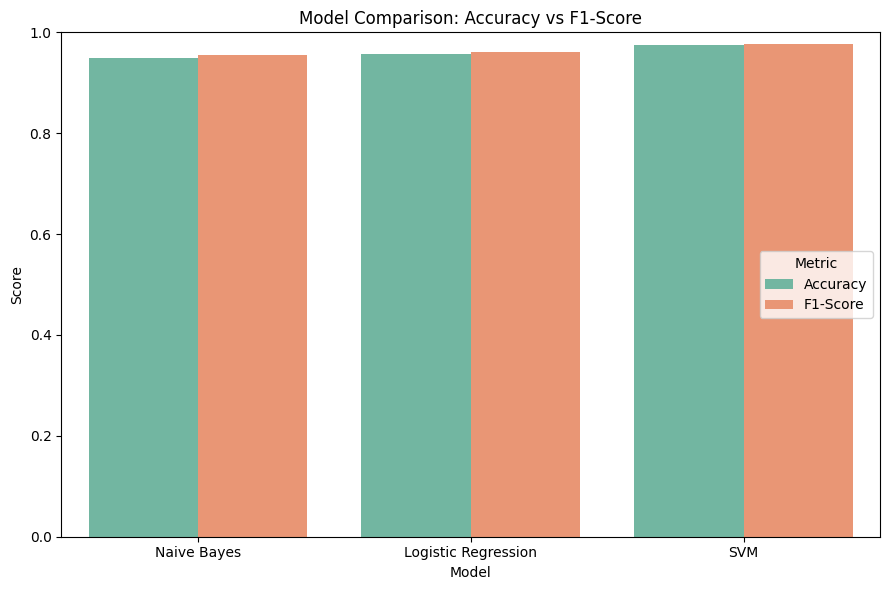

In [72]:
# Reshape dataframe into long format
plot_df = results_df.melt(id_vars="Model", value_vars=["Accuracy", "F1-Score"],
                          var_name="Metric", value_name="Score")

# --- Visualization ---
plt.figure(figsize=(9,6))
sns.barplot(x="Model", y="Score", hue="Metric", data=plot_df, palette="Set2", dodge=0.7)

plt.title("Model Comparison: Accuracy vs F1-Score")
plt.ylabel("Score")
plt.ylim(0, 1)  # scores between 0 and 1
plt.legend(title="Metric", loc="center right")
plt.tight_layout()
plt.show()

# Step 5: Find the best model & Save it

In [ ]:
best_model = None
best_score = 0
best_name = ""

for name, model in models.items():
    # Train
    model.fit(X_train_tfidf, y_train)
    # Predict
    y_pred = model.predict(X_test_tfidf)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)

    # Track best model by Accuracy
    if acc > best_score:
        best_model = model
        best_score = acc
        best_name = name

print(f"\n‚úÖ Best Model: {best_name} with Accuracy = {best_score:.4f}")


‚úÖ Best Model: SVM with Accuracy = 0.9748


In [ ]:
# --- Save the best model using pickle ---
with open("best_spam_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

# --- Save the TF-IDF vectorizer too (needed for preprocessing) ---
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

print("üì¶ Best model and TF-IDF vectorizer saved successfully!")

üì¶ Best model and TF-IDF vectorizer saved successfully!


# Step 6: loading the saved model & testing on new SMS messages.

In [ ]:
# --- Load saved model and vectorizer ---
with open("best_spam_model.pkl", "rb") as f:
    best_model = pickle.load(f)

with open("tfidf_vectorizer.pkl", "rb") as f:
    tfidf = pickle.load(f)

In [ ]:
# --- Preprocessing function (same as before) ---
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "<URL>", text)   # replace URLs
    text = re.sub(r"\+?\d{10,13}", "<PHONE>", text)   # replace phone numbers
    text = re.sub(r"\d+", "<NUM>", text)              # replace numbers
    text = re.sub(r"[^\w\s]", " ", text)              # remove punctuation/symbols
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [ ]:
# --- Prediction function ---
def predict_sms(message):
    # Preprocess
    cleaned = clean_text(message)
    # Vectorize
    features = tfidf.transform([cleaned])
    # Predict
    prediction = best_model.predict(features)[0]
    label = "Spam" if prediction == 1 else "Ham"
    return label

In [ ]:
# --- Test with some examples ---
samples = [
    "‡¶Ü‡¶™‡¶®‡¶æ‡¶∞ ‡¶¨‡¶ø‡¶ï‡¶æ‡¶∂ ‡¶è‡¶ï‡¶æ‡¶â‡¶®‡ßç‡¶ü‡ßá ‡¶ü‡¶æ‡¶ï‡¶æ ‡¶™‡¶æ‡¶†‡¶æ‡¶®‡ßã ‡¶π‡ßü‡ßá‡¶õ‡ßá‡•§",
    "Free offer!!! Click this link to win a prize http://spam.com",
    "‡¶Æ‡¶ø‡¶ü‡¶ø‡¶Ç ‡¶ï‡¶æ‡¶≤ ‡¶¶‡ßÅ‡¶™‡ßÅ‡¶∞ ‡ß®‡¶ü‡¶æ‡ßü ‡¶π‡¶¨‡ßá‡•§ ‡¶∏‡¶¨‡¶æ‡¶á ‡¶Ü‡¶∏‡¶¨‡ßá‡¶®‡•§"
]

In [ ]:
for msg in samples:
    print(f"Message: {msg}")
    print("Prediction:", predict_sms(msg))
    print("-" * 50)


Message: ‡¶Ü‡¶™‡¶®‡¶æ‡¶∞ ‡¶¨‡¶ø‡¶ï‡¶æ‡¶∂ ‡¶è‡¶ï‡¶æ‡¶â‡¶®‡ßç‡¶ü‡ßá ‡¶ü‡¶æ‡¶ï‡¶æ ‡¶™‡¶æ‡¶†‡¶æ‡¶®‡ßã ‡¶π‡ßü‡ßá‡¶õ‡ßá‡•§
Prediction: Spam
--------------------------------------------------
Message: Free offer!!! Click this link to win a prize http://spam.com
Prediction: Spam
--------------------------------------------------
Message: ‡¶Æ‡¶ø‡¶ü‡¶ø‡¶Ç ‡¶ï‡¶æ‡¶≤ ‡¶¶‡ßÅ‡¶™‡ßÅ‡¶∞ ‡ß®‡¶ü‡¶æ‡ßü ‡¶π‡¶¨‡ßá‡•§ ‡¶∏‡¶¨‡¶æ‡¶á ‡¶Ü‡¶∏‡¶¨‡ßá‡¶®‡•§
Prediction: Ham
--------------------------------------------------
